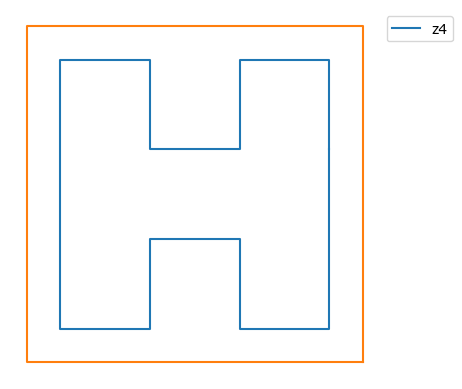

(1.75, 8.0, 0.7463526651802308, 112.0, 113.0)

In [1]:
from matplotlib import pyplot as plt
import numpy as np
def show_plot():
  ax=plt.gca()
  ax.set_aspect('equal')
  ax.set_axis_off()
  plt.show()
  plt.close()
def  hilbert(n):
  a=1+1j
  b=np.conj(a)
  z=np.array([0])
  for k in range(n):
    w=1j*np.conj(z)
    z=np.concatenate([w-a,z-b,z+a,b-w])/2.0
  return z
def moore(n):
  z=-np.conj(hilbert(n))
  w=np.concatenate([z+1+1j,z-1+1j])
  return np.concatenate([w,-1.0*w])/2.0
def area_length(x):
  deltax=np.roll(x,-1)-x
  area=sum(np.conj(x)*deltax).imag/2.0#the cross product
  length=sum(abs(deltax))
  return (area,length)
z4=moore(1)
plt.plot((*z4.real,z4[0].real),(*z4.imag,z4[0].imag),label='z4')
a4,l4=area_length(z4)
r4=(a4/np.pi)**0.5
l=(a4*2)**0.5/2
plt.plot((l,l,-l,-l,l),(-l,l,l,-l,-l))
plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left')
show_plot()
a4,l4,r4,a4/0.125**2,15**2-a4/0.125**2

In [2]:
n=8
zu=np.concatenate([[z4[i-1]*(n-k)+z4[i]*k for k in range(1,n+1)] for i in range(len(z4))])/n
zu=np.roll(zu,-n//2+1)
zuf=np.fft.fft(zu)
rcos=(0.5*(1+np.cos(np.pi*2*np.array(list(range(len(zu))))/len(zu))))
rzu=r4*len(zu)
zuf[1]-=rzu
zuff=zuf*rcos**np.exp(2)
zuff[1]+=rzu
zk=np.fft.ifft(zuff)

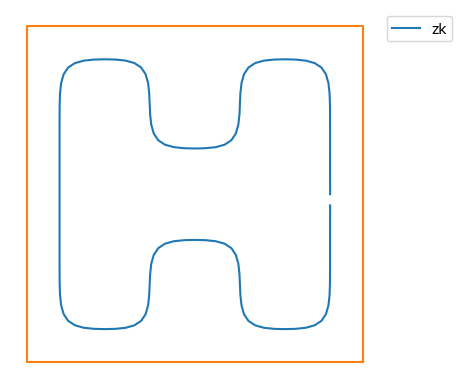

(1.7359228061943617, 7.114555121209215)


In [3]:
plt.plot(zk.real,zk.imag,label='zk')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.plot((l,l,-l,-l,l),(-l,l,l,-l,-l))
show_plot()
print(area_length(zk))

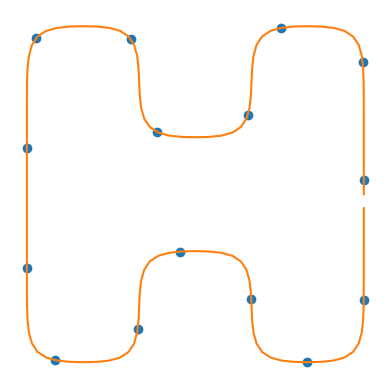

In [4]:
def ifft(fft,t):
  n=len(fft)
  n_2=n//2
  omega=np.roll(np.arange(-n_2,n_2),n_2).reshape((-1,1))
  return np.sum(fft.reshape((-1,1))*np.exp(1j*2*np.pi*omega*t),axis=0)/n
t=np.arange(1/128,1.0,1/15)
x=ifft(zuff,t)
plt.plot(x.real,x.imag,'o')
plt.plot(zk.real,zk.imag)
show_plot()

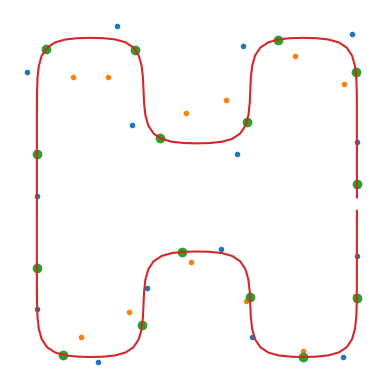

In [5]:
def ifft_(fft,t):
  n=len(fft)
  n_2=n//2
  omega=np.roll(np.arange(-n_2,n_2),n_2).reshape((-1,1))
  return np.sum(fft.reshape((-1,1))*1.0j*2*np.pi*omega*np.exp(1j*2*np.pi*omega*t),axis=0)/n
def ifft__(fft,t):
  n=len(fft)
  n_2=n//2
  omega=np.roll(np.arange(-n_2,n_2),n_2).reshape((-1,1))
  return np.sum(fft.reshape((-1,1))*(1.0j*2*np.pi*omega)**2*np.exp(1j*2*np.pi*omega*t),axis=0)/n
x_=ifft_(zuff,t)/(len(zk))*np.pi
x__=ifft__(zuff,t)/(len(zk)**2)*10
plt.plot(x.real+x_.real,x.imag+x_.imag,'.')
plt.plot(x.real+x__.real,x.imag+x__.imag,'.')
plt.plot(x.real,x.imag,'o')
plt.plot(zk.real,zk.imag)
show_plot()

(96.61, 0)


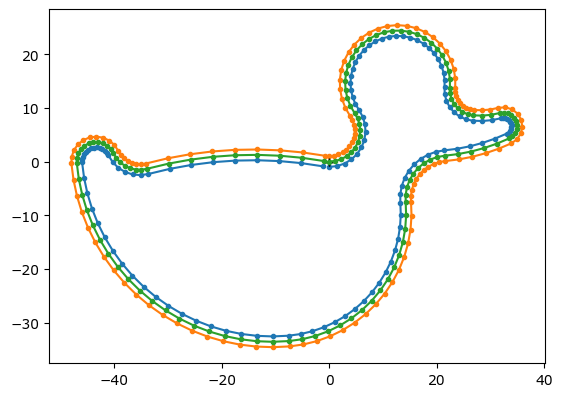

130

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi,exp,sign
deg=pi/180
StarSegments=[s for n,a in ((5,130.0),) for _ in range(n) for s in ((2,-(a-360/n)*deg),(8,0.0),(3.2,a*deg),(8,0.0),)] 
DuckSegments=[(0.4,-10.0*deg),(13.297,25.0*deg),(3,-80.0*deg),(4,160.0*deg),(22.913,90.0*deg),(15,90.0*deg),(5,-90.0*deg), (5,20.0*deg),(3,170.0*deg),(2,-20.0*deg),(3,-90.0*deg),(15,220.0*deg),(5,-125.0*deg),]
def SegmentsLengthArea(Segs):
  a=0
  l=0
  p0=p1=p2=0+0j
  for dl,dang in Segs:
    l+=dl
    v=1j**(dang*(2/pi))-1 
    p1=p2
    p2=p1+v
    
  return l,a
print(SegmentsLengthArea(DuckSegments))

def InterpSegments(Segs,t,p0=0+0j,a0=1+0j,scale=1):
  dl,dang=np.array(Segs).transpose()
  l,ang=np.cumsum(Segs,axis=0).transpose()
  ang=exp(1j*np.insert(ang,0,0))*a0
  viSeg=np.sinc(dang/(2*pi))*dl*scale*np.exp(1j*dang/2)*ang[:-1]
  pSeg=np.cumsum(viSeg)+p0 
  l=l/l[-1]
  l=np.insert(l,0,0) 
#  print(f'{len(l)=},{len(Segs)=}' )
  Xx=np.interp(np.array(t)%1,l,range(len(l)))
  X=Xx.astype(int)#segment index
  x=Xx%1#within seggment
  return pSeg[X-1] + np.sinc( dang[X]*x /(2*pi))* dl[X]*x *scale*np.exp(1j* dang[X]*x /2)*ang[X]
  
def Segments2Complex(Segs,p0=0+0j,scale=1.0,a0=1+0j,tol=0.05,offs=0,return_heading=False):
  a=a0
  p=p0
  p-=1j*a*offs
  for l,da in Segs:
    l=l*scale
    if da!=0:
      r=l/da
      r+=offs
      dl=2*abs(2*r*tol)**0.5
      n=max(int(abs(6*(da/(2*pi)))),int(l//dl)+1)
      dda=exp(1j*da/n)
      dda2=dda**0.5 
      v=(2*r*dda2.imag)*dda2*a
    else:
      n=1
      dda=1
      v=l*a
    for _ in range(n):
      p+=v
      if return_heading:
        yield p,a
      else:
        yield p
      v*=dda
      a*=dda
        
for offs in (-1,1,0):
  x,a=np.array(list(Segments2Complex(DuckSegments,scale=2.5,a0=-1,tol= 0.033,offs=offs,return_heading=True))).transpose()
#  x-=1j*a*offs
  plt.plot(0,0,'k+')
  plt.plot(x.real,x.imag,'.-') 
plt.gca().set_aspect('equal')
plt.show()
len(x)

In [7]:
x_=np.insert(x,0,0+0j)
dx=abs(x_-np.roll(x_,+1))
y=np.cumsum(dx)

In [8]:
l=y[-1]
n=128
dl=l/n
t=np.arange(0.08*dl,l-0.5*dl,dl)
p=np.interp(t,y,x_)

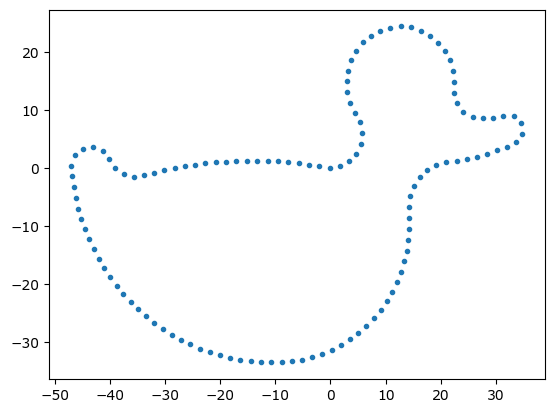

In [9]:
plt.plot(p.real,p.imag,'.')

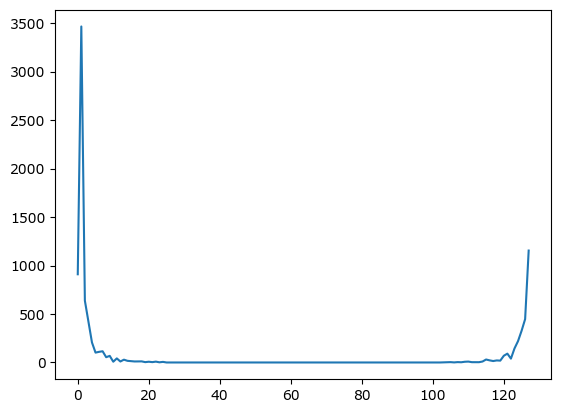

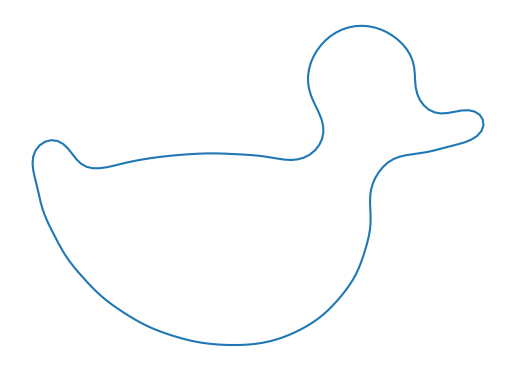

In [10]:
fp2=np.fft.fft(p)
fp2[25:-25]=0
t2=np.linspace(0,1,201) 
p2=ifft(fp2,t2)
plt.plot(abs(fp2))  
plt.show()
plt.plot(p2.real,p2.imag,'-')
show_plot()

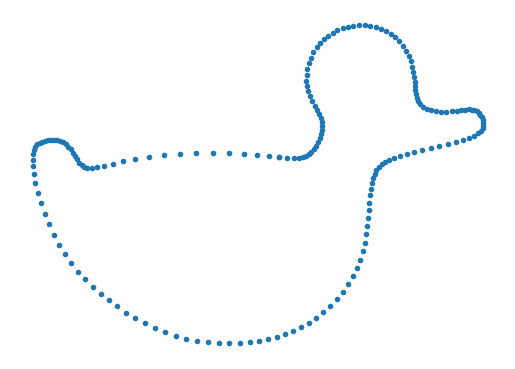

In [11]:
fp3=np.fft.fft(x) 
fp3[14:-14]=0 
t3=np.linspace(0,1,200)    
p3=ifft(fp3,t3) 
plt.plot(p3.real,p3.imag,'.')
show_plot()

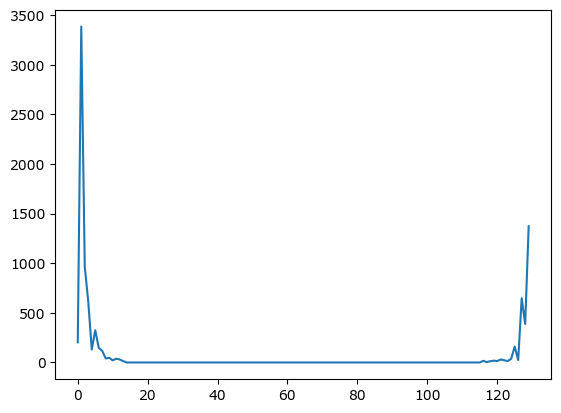

In [12]:
plt.plot(abs(fp3));

(1.2136806333429986, 2.7782561343323833, 0.3704341512443177)

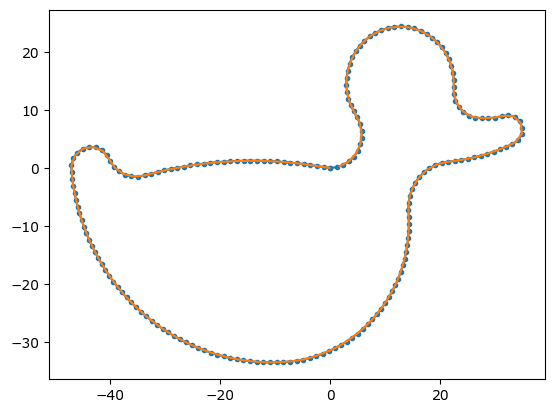

In [19]:
p4=InterpSegments(DuckSegments,t3,a0=-1,scale=2.5)
plt.plot(p4.real,p4.imag,'.-')
plt.plot(p.real,p.imag)